Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style= "whitegrid")



load the data set

In [ ]:
df= pd.read_csv("/content/Breast Cancer METABRIC.csv")
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


understand data set structure

In [ ]:
print("shape:",df.shape)
df.info()

shape: (2509, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status meas

select clinically important columns

In [ ]:
Clinical_columns = [
    'Age at Diagnosis',
    'Tumor Size',
    'Lymph nodes examined positive',
    'Nottingham prognostic index',
    'Overall Survival (Months)',
    'Overall Survival Status'
]

Clinical_df = df[Clinical_columns]
Clinical_df.head()

,Age at Diagnosis,Tumor Size,Lymph nodes examined positive,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status
0,75.65,22.0,10.0,6.044,140.500000,Living
1,43.19,10.0,0.0,4.020,84.633333,Living
2,48.87,15.0,1.0,4.030,163.700000,Deceased
3,47.68,25.0,3.0,4.050,164.933333,Living
4,76.97,40.0,8.0,6.080,41.366667,Deceased


Missing value analysis

In [ ]:
Clinical_df.isnull().sum()

,0
Age at Diagnosis,11
Tumor Size,149
Lymph nodes examined positive,266
Nottingham prognostic index,222
Overall Survival (Months),528


Handling missing values


In [ ]:
Clinical_df = Clinical_df.fillna(Clinical_df.median())

Exploratory data analysis

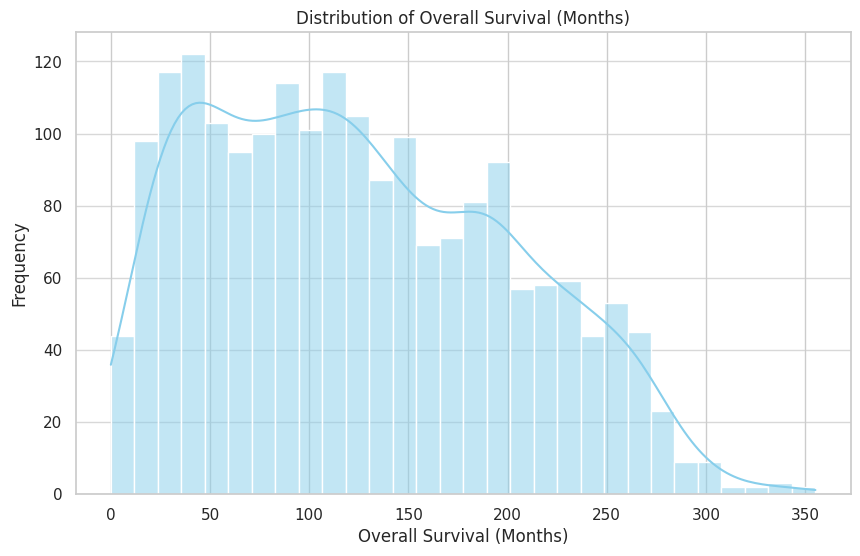

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(Clinical_df['Overall Survival (Months)'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Overall Survival (Months)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Age at diagnosis vs survival

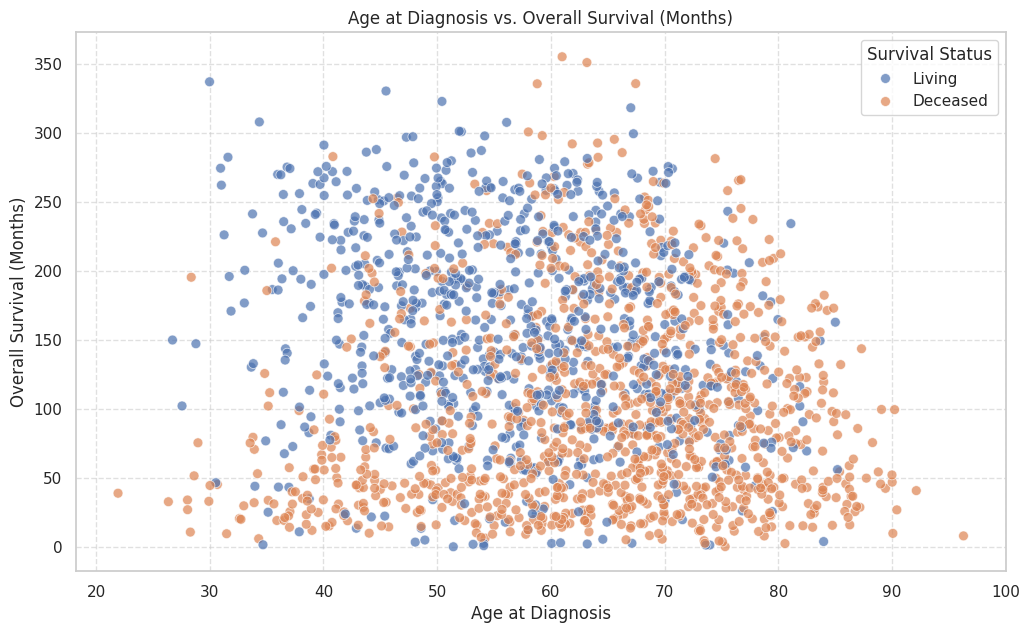

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Age at Diagnosis',
    y='Overall Survival (Months)',
    hue='Overall Survival Status',
    data=Clinical_df,
    alpha=0.7,
    s=50  # Size of points
)
plt.title('Age at Diagnosis vs. Overall Survival (Months)')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Overall Survival (Months)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Survival Status')
plt.show()

Tumor vs survival

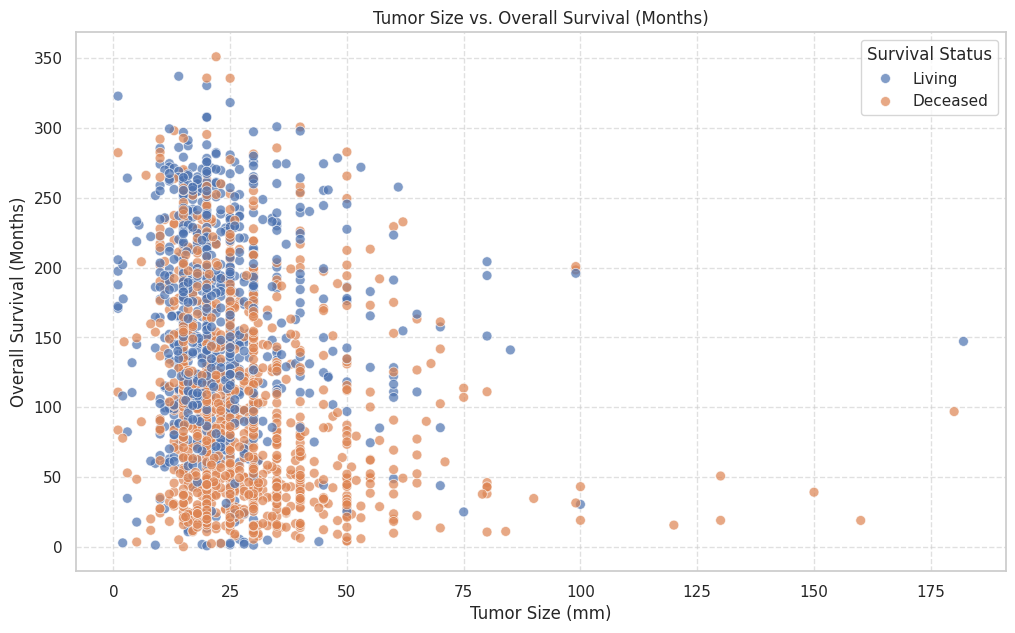

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Tumor Size',
    y='Overall Survival (Months)',
    hue='Overall Survival Status',
    data=Clinical_df,
    alpha=0.7,
    s=50  # Size of points
)
plt.title('Tumor Size vs. Overall Survival (Months)')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Overall Survival (Months)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Survival Status')
plt.show()

lymph node invovlvment vs survival

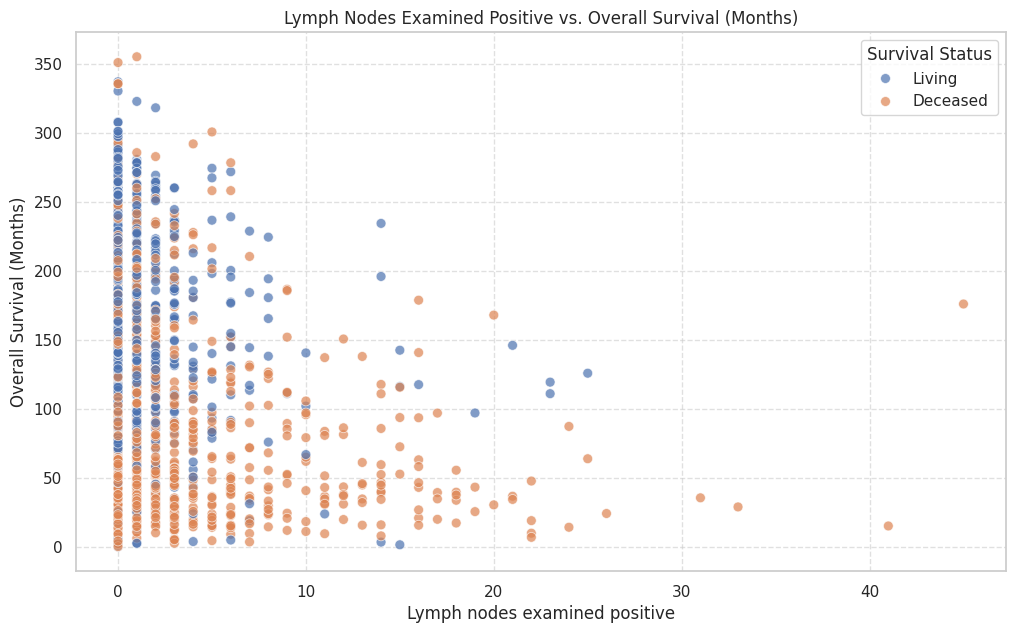

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='Lymph nodes examined positive',
    y='Overall Survival (Months)',
    hue='Overall Survival Status',
    data=Clinical_df,
    alpha=0.7,
    s=50  # Size of points
)
plt.title('Lymph Nodes Examined Positive vs. Overall Survival (Months)')
plt.xlabel('Lymph nodes examined positive')
plt.ylabel('Overall Survival (Months)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Survival Status')
plt.show()

Correlation heatmap

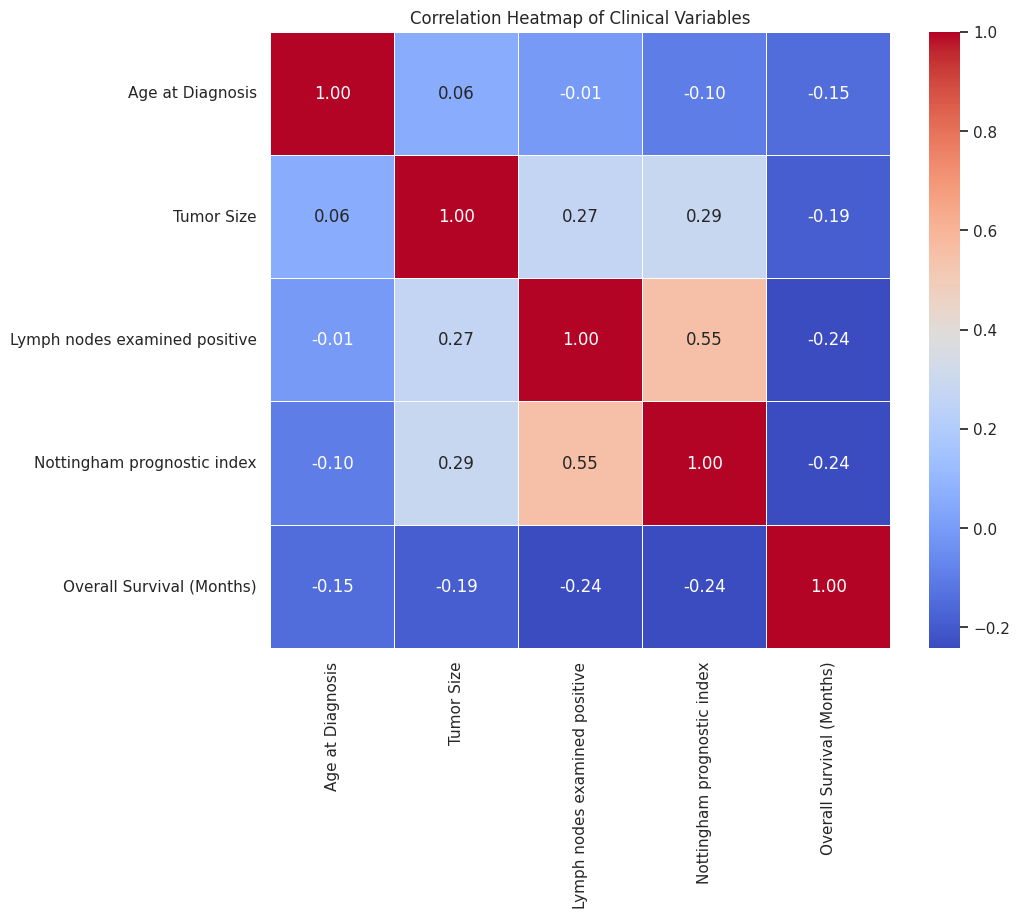

In [ ]:
correlation_matrix = Clinical_df.drop('Overall Survival Status', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Clinical Variables')
plt.show()

In [3]:
# Import Libraries and load the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

df = pd.read_csv("/content/Breast Cancer METABRIC.csv")
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
# Basic Understanding of the dataset

df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Tumor Size,Tumor Stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2357.000000,2287.000000,1981.000000,2388.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.578702,4.028787,125.244271,108.842487,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.967967,1.189092,76.111772,76.519494,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,80.000000,7.200000,355.200000,384.210000,182.000000,4.000000


In [11]:
# Identifying Target Variable and Input Feature

# Define the target variable
Target = "Overall Survival Status"

# Define the input feature
Feature = [col for col in df.columns
           if col !=Target]

print("Target Variable:", Target)
print("Number of Input Features:", len(Feature))

Target Variable: Overall Survival Status
Number of Input Features: 33


In [12]:
# Checking Target Variable Distribution

df[Target].value_counts()

,count
Overall Survival Status,
Deceased,1144
Living,837


In [13]:
# Data Cleaning and preprocessing

# Missing Value Analysis
df.isnull().sum()

,0
Patient ID,0
Age at Diagnosis,11
Type of Breast Surgery,554
Cancer Type,0
Cancer Type Detailed,0
Cellularity,592
Chemotherapy,529
Pam50 + Claudin-low subtype,529
Cohort,11
ER status measured by IHC,83


In [17]:
from sklearn.impute import SimpleImputer

# Separate Numerical and Categorical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
Cat_cols = df.select_dtypes(include=['object']).columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[Cat_cols] = cat_imputer.fit_transform(df[Cat_cols])

In [20]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in Cat_cols:
  df[col] = le.fit_transform(df[col])

In [21]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

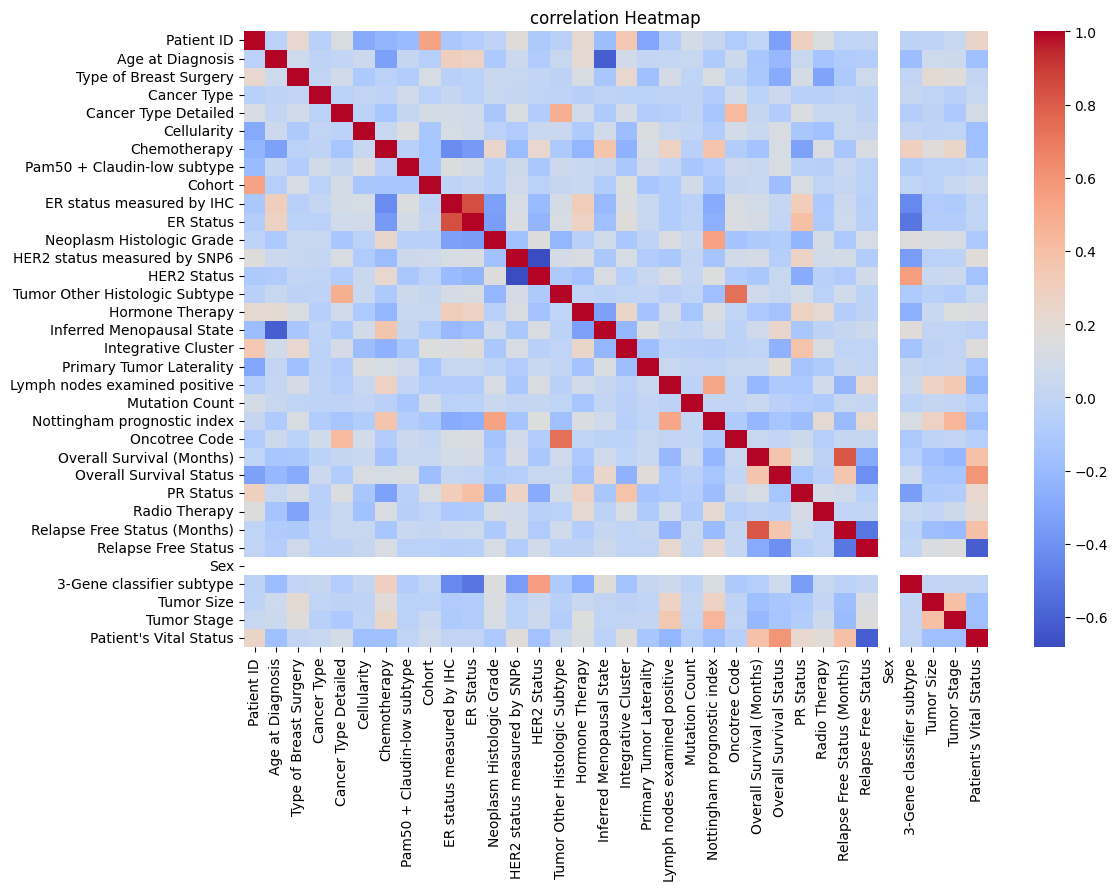

In [22]:
# Correlation Analysis and Feature Reduction

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

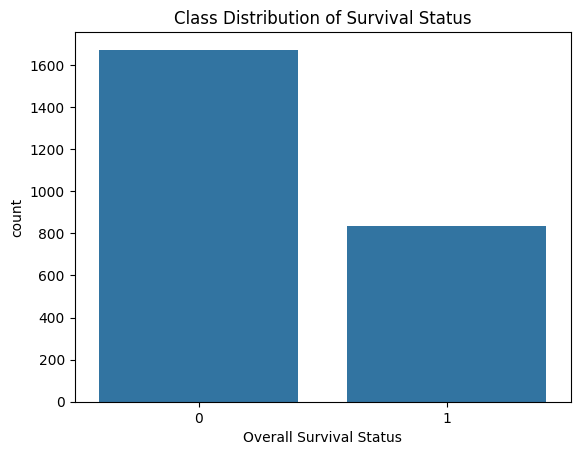

In [25]:
# Exploratory Data Analysis

sns.countplot(x=Target, data=df)
plt.title("Class Distribution of Survival Status")
plt.show()

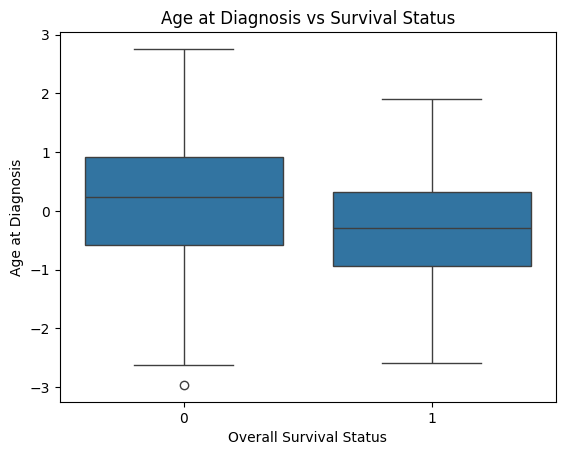

In [30]:
# Feature vs Target Analysis

sns.boxplot(x=Target, y='Age at Diagnosis', data=df)
plt.title("Age at Diagnosis vs Survival Status")
plt.show()

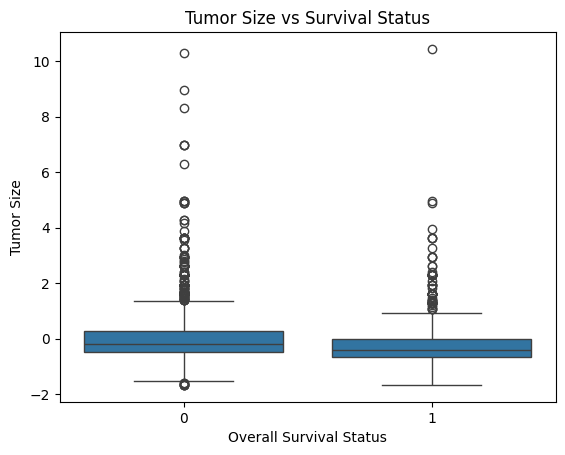

In [33]:
sns.boxplot(x=Target, y='Tumor Size', data=df)
plt.title("Tumor Size vs Survival Status")
plt.show()

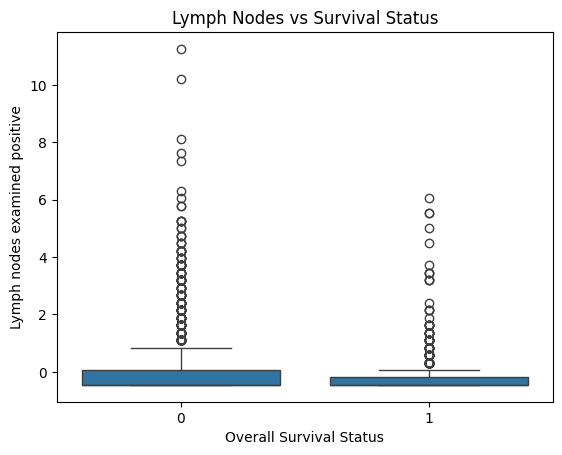

In [36]:
sns.boxplot(x=Target, y='Lymph nodes examined positive', data=df)
plt.title("Lymph Nodes vs Survival Status")
plt.show()

In [38]:
# Correlation based feature importance
corr_target = df.corr()[Target].sort_values(ascending=False)
corr_target



,Overall Survival Status
Overall Survival Status,1.000000
Patient's Vital Status,0.594730
Overall Survival (Months),0.373526
Relapse Free Status (Months),0.358086
Inferred Menopausal State,0.238100
Primary Tumor Laterality,0.181248
Cellularity,0.129394
Pam50 + Claudin-low subtype,0.123368
Chemotherapy,0.117642
3-Gene classifier subtype,0.065073
